<picture>
  <!--Imagem para o tema dark-->
  <source media="(prefers-color-scheme: dark)" srcset="https://github.com/CatarinaAguiar3/Projeto_Sistema_de_Recomendacao_MovieLens/blob/main/Imagens/Banners/Dark_Titulo1_Limpeza.png?raw=true">
  
  <!--Imagem para o tema light-->
  <source media="(prefers-color-scheme: light)" srcset="https://github.com/CatarinaAguiar3/Projeto_Sistema_de_Recomendacao_MovieLens/blob/main/Imagens/Banners/Titulo1_Limpeza_v2.png?raw=true">

  <!--Imagem padrão (quando os temas dark e light não forem identificados -->
  <img src="https://github.com/CatarinaAguiar3/Projeto_Sistema_de_Recomendacao_MovieLens/blob/main/Imagens/Banners/Titulo1_Limpeza_v2.png?raw=true">
</picture>

# **Entendimento do negócio**

## Introdução
[MovieLens](https://movielens.org/) é um site de recomendação de filmes, administrado por um laboratório de pesquisa da Universidade de Minnesota.
<br>
Ele funciona da seguinte forma: o usuário  cria um conta e avalia os filmes , assim o MovieLens cria uma recomendação personalizada , indicando outros filmes para o usuário assistir.
Este projeto usará dados deste site que podem ser acessados neste link: [MovieLens Latest Datasets (arquivo completo)](https://grouplens.org/datasets/movielens/latest/)


## Objetivo
O objetivo é criar um sistema de recomendação de gênero de filme usando a linguagem Python.

## Como funciona o site MovieLens?
Ao criar sua conta de usuário, é necessário escolher as categorias de filmes de sua preferância.
<br><br>
[<img src="https://github.com/CatarinaAguiar3/Projeto_Sistema_de_Recomendacao_MovieLens/blob/main/Imagens/Limpeza_e_Transformacao/Tela1.1_MovieLens.png?raw=true" width="95%">](https://github.com/CatarinaAguiar3/Projeto_Sistema_de_Recomendacao_MovieLens/blob/main/Imagens/Limpeza_e_Transformacao/Tela1.1_MovieLens.png?raw=true)

<br><br>
Em seguida, o site mostra um tutorial de como funciona:
<br><br>
[<img src="https://github.com/CatarinaAguiar3/Projeto_Sistema_de_Recomendacao_MovieLens/blob/main/Imagens/Limpeza_e_Transformacao/Tela2.1_Tutorial_MovieLens.png?raw=true" width="50%">](https://github.com/CatarinaAguiar3/Projeto_Sistema_de_Recomendacao_MovieLens/blob/main/Imagens/Limpeza_e_Transformacao/Tela2.1_Tutorial_MovieLens.png?raw=true)


# **Entendimento dos dados**

## Importar Bibliotecas

In [1]:
import pandas as pd
import os
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## Definir Diretório

In [5]:
os.chdir("C:/0.Projetos/5.Sistema_de_Recomendacao_MovieLens_2")

## Carregar Arquivos

In [6]:
ratings_amostragem = pd.read_pickle("Datasets/1.Datasets_Amostragem/amostragem_ratings.pickle", compression="gzip")

In [7]:
movies_amostragem = pd.read_pickle("Datasets/1.Datasets_Amostragem/movies_amostragem.pickle", compression="gzip")

In [8]:
tags_amostragem = pd.read_pickle("Datasets/1.Datasets_Amostragem/tags_amostragem.pickle", compression="gzip")

In [9]:
genome_tags_amostragem = pd.read_pickle("Datasets/1.Datasets_Amostragem/genome_tags_amostragem.pickle", compression="gzip")

In [10]:
genome_scores_amostragem = pd.read_pickle("Datasets/1.Datasets_Amostragem/genome_scores_amostragem.pickle", compression="gzip")

# **Funções**

## Função1: descrever os dados

In [11]:
def descrever_dados(tabela: pd.DataFrame):

    tipo_dados = tabela.dtypes

    # Calcular a quantidade de valores ausentes em cada coluna
    quantidade_ausentes = tabela.isna().sum()
        
    # Calcular a porcentagem de valores ausentes em cada coluna
    porcentagem_ausentes = tabela.isna().mean()

    valor_unico = tabela.nunique()

    # Concatenar os DataFrames individualmente
    tabela_resumo = pd.concat([tipo_dados, valor_unico, quantidade_ausentes, porcentagem_ausentes], axis=1)
    tabela_resumo.columns = ['Tipo de dados', 'Valores únicos', 'Quantidade de NA´s', 'Porcentagem de NA´s']

    # Exibir os resultados
    print(f"Nº de Linhas: {len(tabela)}")
    print(f"Nº de Colunas: {tabela.shape[1]}\n\n")
   
    return tabela_resumo

    # OBS: tabela_resumo.columns -> retorna uma lista com os nomes das colunas do DataFrame tabela_resumo
    #                               Em seguida, renomeamos as colunas da tabela_resumo
    

## Função 2: quantidade e porcentagem de valores ausentes

In [12]:
def valores_ausentes(tabela: pd.DataFrame):
    # Calcular a quantidade de valores ausentes em cada coluna
    quantidade_ausentes = tabela.isna().sum()
        
    # Calcular a porcentagem de valores ausentes em cada coluna
    porcentagem_ausentes = (quantidade_ausentes / len(tabela)) * 100
    #ou
    #porcentagem_ausentes = ratings.isna().mean()

    # Exibir os resultados
    print("Quantidade e Porcentagem de NA's:")
    print(pd.concat([quantidade_ausentes, porcentagem_ausentes], axis=1, keys=['Quantidade', 'Porcentagem']))

## Função 3: Calcular o Resumo Estatístico

In [13]:
def resumo_estatistico(tabela:pd.DataFrame, coluna:str) -> pd.DataFrame:

    # Calcula estatísticas descritivas usando agg
    resumo = tabela[coluna].agg(['count', 'mean','median', 'std', 'min', 'max' ]).round(2)

    # Renomeiar a coluna 'median' para 'median (50%)'
    resumo = resumo.rename(index={'median': 'median (50%)'})

    # Calcula percentis usando quantile
    percentis = tabela[coluna].quantile([0.25, 0.5, 0.75]).round(2)

    # Combina os resultados em um DataFrame único
    resumo = pd.concat([resumo, percentis.rename({0.25: '25%', 0.5: '50%', 0.75: '75%'})])

    display(resumo)

## Função 4: Retorna a frequência e proporção dos valores únicos

In [14]:
def valores_unicos(tabela:pd.DataFrame, coluna:str) -> pd.DataFrame:
    
    # Calcula a contagem dos valores únicos usando value_counts
    contagem = tabela[coluna].value_counts().reset_index()

    # Renomeia as colunas para tornar o resultado mais claro
    contagem.columns = ['Valor_Único', 'Frequência']

    # Adiciona uma coluna de proporção em porcentagem
    contagem['Proporção (%)'] = (contagem['Frequência'] / contagem['Frequência'].sum()) * 100

    # Arredonda a coluna de proporção para 4 casas decimais
    contagem['Proporção (%)'] = contagem['Proporção (%)'].round(4)

    # Formata a coluna de proporção como porcentagem
    contagem['Proporção (%)'] = contagem['Proporção (%)'].map('{:.4f}%'.format)

    return contagem

# **Classes**

## Classe 1: Fazer o slipt por user

In [15]:
class AmostragemUser:
    def __init__(self, tabela:pd.DataFrame, coluna_user:str):
        self.tabela = tabela
        self.coluna_user = coluna_user
        self.amostragem1 = None

    def amostragem(self, porcentagem):
        self.amostragem1 = np.random.choice(self.tabela[self.coluna_user].unique(),
                                            size=int(len(self.tabela[self.coluna_user].unique()) * porcentagem),
                                            replace=False)
        return self.amostragem1

    def df_treino(self):
        if self.amostragem1 is None:
            raise ValueError("Realize a amostragem antes de chamar este método")
        amostragem_tabela = self.tabela.loc[self.tabela[self.coluna_user].isin(self.amostragem1)]
        return amostragem_tabela

    def df_teste(self):
        if self.amostragem1 is None:
            raise ValueError("Realize a amostragem antes de chamar este método")
        amostragem_complementar = self.tabela.loc[~self.tabela[self.coluna_user].isin(self.amostragem1)]
        return amostragem_complementar

## Classe 2: Fazer o slipt da tabela movies

In [16]:
class AmostragemMovies:
    ''' Classe que faz amostragem da tabela movie a partir da tabela ratings 
    Args:
    - df_rating_treino: tabela rating com os dados de treino
    - df_rating_teste: tabela rating com os dados de teste
    - df_movie: tabela movie
    - col_movie: nome da coluna movie
    '''
    def __init__(self, df_rating_treino:pd.DataFrame, df_rating_teste:pd.DataFrame, df_movie:pd.DataFrame, col_movie:str):
        self.df_rating_treino = df_rating_treino
        self.df_rating_teste = df_rating_teste
        self.df_movie = df_movie
        self.col_movie = col_movie

    def movie_treino(self) -> pd.DataFrame:
        # Selecionar os "movieId" da tabela "df_rating_treino"
        movieId_treino = np.array(self.df_rating_treino[self.col_movie])
        # Filtrar os mesmo de IDs de "df_rating_treino" na tabela "df_movie_treino"
        movies_amostragem_treino = self.df_movie[self.df_movie[self.col_movie].isin(movieId_treino)]

        return  movies_amostragem_treino 

    
    def movie_teste(self) -> pd.DataFrame:
        # Selecionar os "movieId" da tabela "df_rating_teste"
        movieId_teste = np.array(self.df_rating_teste[self.col_movie])
        # Filtrar os mesmo de IDs de "df_rating_treino" na tabela "df_movie_teste"
        movies_amostragem_teste = self.df_movie[self.df_movie[self.col_movie].isin(movieId_teste)]

        return  movies_amostragem_teste 


## Classe 3: Fazer o slipt da tabela Tags

In [17]:
class AmostragemTags:
    ''' Classe que faz o slipt na tabela Tags
    '''
    def __init__(self, df_ratings_treino: pd.DataFrame, df_ratings_teste: pd.DataFrame, df_tags: pd.DataFrame, col_user: str, col_movie: str):
        self.df_ratings_treino = df_ratings_treino
        self.df_ratings_teste = df_ratings_teste
        self.df_tags = df_tags
        self.col_user = col_user
        self.col_movie = col_movie

    # Método privado
    def _filtrar_tags(self, df_ratings: pd.DataFrame) -> pd.DataFrame:
        ''' Método privado que realiza a filtragem com base em um DataFrame de entrada.
        '''
        amostragem_ratings = df_ratings[[self.col_user, self.col_movie]]
        return amostragem_ratings.merge(self.df_tags, on=[self.col_movie, self.col_user], how="inner")

    def df_tag_treino(self) -> pd.DataFrame:
        ''' Utiliza o método _filtrar_tags para criar os dados de treino
        '''
        return self._filtrar_tags(self.df_ratings_treino)

    def df_tag_teste(self) -> pd.DataFrame:
        ''' Utiliza o método _filtrar_tags para criar os dados de teste
        '''
        return self._filtrar_tags(self.df_ratings_teste)


## Classe 4: Fazer o slipt das tabela Genome-Tags e Genome-Scores

In [18]:
class AmostragemGenome:
    def __init__(self, df_tag_treino, df_tag_teste, df_genome, col_tag):
        '''
        Args:
        - df_tag : pode ser as tabelas tags ou genome-tags
        '''
        self.df_tag_treino = df_tag_treino
        self.df_tag_teste = df_tag_teste
        self.df_genome = df_genome
        self.col_tag = col_tag
   
    def _filtrar_tags(self, df):
        # Selecionar as col_tag que serão usadas no filtro 
        tag_array = np.array(df[self.col_tag])

        # Filtrar as col_tag da amostragem
        genome_amostragem = self.df_genome.loc[self.df_genome[self.col_tag].isin(tag_array)]      
        return genome_amostragem

    def df_treino(self):
        genome_treino = self._filtrar_tags(self.df_tag_treino)
        return genome_treino

    def df_teste(self):
        genome_teste = self._filtrar_tags(self.df_tag_teste)
        return genome_teste


# **Descrever os dados**
Este conjunto de dados têm 6 tabelas com 3.383.2162 classificações e 2.328.315 tags em 86.537 filmes. Esses dados foram criados por 330.975 usuários entre 9 de janeiro de 1995 e 20 de julho de 2023. Este conjunto de dados foi gerado em 20 de julho de 2023.  
<br>
Os usuários foram selecionados aleatoriamente para inclusão. Todos os usuários selecionados avaliaram pelo menos 1 filme. Nenhuma informação demográfica está incluída. Cada usuário é representado por um ID e nenhuma outra informação é fornecida.

## O que são genoma tags ?
O genoma da tag é uma estrutura de dados que contém pontuações de relevância de tags para filmes. A estrutura é uma matriz densa: cada filme do genoma possui um valor para cada tag do genoma.
<br>
A coluna `relevance` mostra a relevancia da tag em uma escala contínua (0-1).

## Tabela movies
A tabelas tem 3 colunas e 86.537 linhas.
<br>
Não há valores ausentes e os tipos de dados parecem ser adequados.


### Primeiras linhas da tabela movies

In [44]:
movies_amostragem.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Descrever dados da tabela movies

In [16]:
descrever_dados(movies_amostragem)

Nº de Linhas: 26770
Nº de Colunas: 3




,Tipo de dados,Valores únicos,Quantidade de NA´s,Porcentagem de NA´s
movieId,int64,26770,0,0.0
title,object,26745,0,0.0
genres,object,1314,0,0.0


## Tabela Ratings
A tabela tem 4 linhas e 33.832.162 linhas.
<br>
Não há valores ausentes e talvez seja preciso fazer alguma modificação na coluna `timestamp`.


### Primeiras linhas da tabela ratings

In [17]:
#Primeiras linhas da tabela
ratings_amostragem.head()

,userId,movieId,rating,timestamp
213,5,47,5.0,1029389303
214,5,175,4.0,1029389417
215,5,257,4.0,1029389115
216,5,318,4.0,1029389280
217,5,319,4.0,1029389327


### Descrever dados da tabela ratings

In [18]:
descrever_dados(ratings_amostragem)

Nº de Linhas: 1028502
Nº de Colunas: 4




,Tipo de dados,Valores únicos,Quantidade de NA´s,Porcentagem de NA´s
userId,int64,9929,0,0.0
movieId,int64,26770,0,0.0
rating,float64,10,0,0.0
timestamp,int64,859542,0,0.0


### Resumo Estatístico da tabela ratings

In [26]:
# Executar função que retorna com o resumo estatístico de ratings
resumo_estatistico(tabela=ratings_amostragem , coluna='rating')

count           1028502.00
mean                  3.52
median (50%)          3.50
std                   1.07
min                   0.50
max                   5.00
25%                   3.00
50%                   3.50
75%                   4.00
Name: rating, dtype: float64

In [28]:
# Executar a função que retorna com a frequencia e prorporção de valores únicos de ratings
valores_unicos(tabela=ratings_amostragem , coluna="rating")

,Valor_Único,Frequência,Proporção (%)
0,4.0,267323,25.9915%
1,3.0,197192,19.1727%
2,5.0,144397,14.0395%
3,3.5,135292,13.1543%
4,4.5,94134,9.1525%
5,2.0,68080,6.6193%
6,2.5,55152,5.3624%
7,1.0,30763,2.9910%
8,1.5,18275,1.7769%
9,0.5,17894,1.7398%


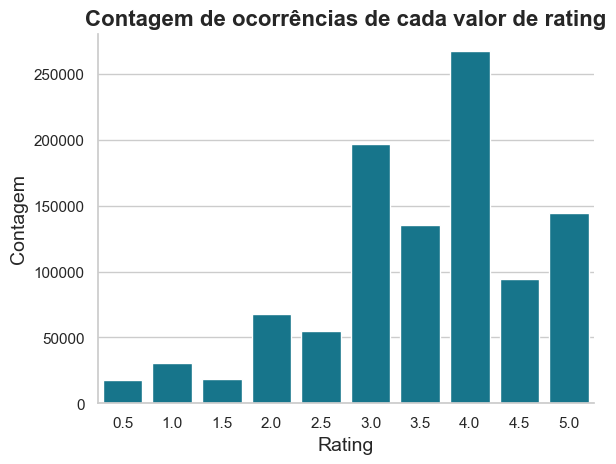

In [32]:
# Criar um gráfico de contagem para a coluna ratings
sns.set(style="whitegrid")
sns.countplot(x=ratings_amostragem['rating'], color="#04819E")

# Adicionar título e rótulos aos eixos
plt.title('Contagem de ocorrências de cada valor de rating', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

# Remover as bordas de cima e da direita
sns.despine(top=True, right=True)

# Exibir o gráfico
plt.show()


## Tabela Tags
A tabela tem 4 colunas e 2.328.315 linhas. 
<br>
Ela apresenta 17 valores ausentes na coluna `tag` . E, talvez seja necessário mudar o tipo de dados da coluna `timestamp`. 

### Primeiras linhas da tabela tags

In [19]:
tags_amostragem.head()

,userId,movieId,tag,timestamp
0,134,89898,advertising,1521614243
1,134,89898,drugs,1521614238
2,134,89898,Russia,1521614240
3,134,182899,Action,1514209025
4,134,182899,Asia,1514209050


### Descrever dados da tabela tags

In [20]:
descrever_dados(tags_amostragem)

Nº de Linhas: 51299
Nº de Colunas: 4




,Tipo de dados,Valores únicos,Quantidade de NA´s,Porcentagem de NA´s
userId,int64,674,0,0.0
movieId,int64,5693,0,0.0
tag,object,10416,0,0.0
timestamp,int64,50566,0,0.0


## Tabela genome_tags
A tabela tem  2 colunas e 1.128 linhas.
<br>
Não há valores ausentes e os tipos de dados parecem adequados.

### Primeiras linhas da tabela genome_tags

In [21]:
genome_tags_amostragem.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


### Descrever dados da tabela genome_tags

In [22]:
descrever_dados(genome_tags_amostragem)

Nº de Linhas: 977
Nº de Colunas: 2




,Tipo de dados,Valores únicos,Quantidade de NA´s,Porcentagem de NA´s
tagId,int64,977,0,0.0
tag,object,977,0,0.0


## Tabela genome_scores
A tabela tem 3 colunas e 18.472.128 linhas. 
<br>
Não há dados nulos e os tipos de dados parecem adequados.

### Primeiras linhas da tabela genome_scores

In [23]:
genome_scores_amostragem.head()

,movieId,tagId,relevance
0,1,1,0.03200
1,1,2,0.02225
2,1,3,0.07000
3,1,4,0.05900
4,1,5,0.12300


### Descrever dados da tabela genome_scores

In [24]:
descrever_dados(genome_scores_amostragem)

Nº de Linhas: 15999352
Nº de Colunas: 3




,Tipo de dados,Valores únicos,Quantidade de NA´s,Porcentagem de NA´s
movieId,int64,16376,0,0.0
tagId,int64,977,0,0.0
relevance,float64,4000,0,0.0


# ⚠ **Limpeza**
> #### Não há dados nulos, por isso, não há necessidade de limpeza.

# **Splits**

## Split na tabela ratings

In [10]:
split_ratings = AmostragemUser(tabela = ratings_amostragem, coluna_user = "userId" )

In [11]:
split_ratings.amostragem(0.8)

array([ 59939, 286046, 129833, ..., 173600, 199398, 130044], dtype=int64)

In [12]:
ratings_treino = split_ratings.df_treino()
ratings_treino 

,userId,movieId,rating,timestamp
213,5,47,5.0,1029389303
214,5,175,4.0,1029389417
215,5,257,4.0,1029389115
216,5,318,4.0,1029389280
217,5,319,4.0,1029389327
...,...,...,...,...
33830996,330963,53953,0.5,1230144729
33830997,330963,54190,3.0,1230144915
33830998,330963,55069,5.0,1230144786
33830999,330963,55282,5.0,1230144757


In [13]:
ratings_teste = split_ratings.df_teste()
ratings_teste 

,userId,movieId,rating,timestamp
11083,128,168,3.0,901631778
11084,128,208,1.0,901631856
11085,128,356,4.0,901632020
11086,128,480,2.0,901631678
11087,128,590,2.0,901631481
...,...,...,...,...
33829593,330948,115210,1.0,1452142688
33829594,330948,129779,1.5,1452141617
33829595,330948,130634,0.5,1452141204
33829596,330948,132584,0.5,1452142683


In [14]:
# Salvar tabela ratings_treino 
ratings_treino.to_pickle("C:/0.Projetos/5.Sistema_de_Recomendação_MovieLens_2/Datasets/2.Datasets_Limpeza/ratings_treino.pickle", compression="gzip") 

In [15]:
# Salvar tabela ratings_teste
ratings_teste.to_pickle("C:/0.Projetos/5.Sistema_de_Recomendação_MovieLens_2/Datasets/2.Datasets_Limpeza/ratings_teste.pickle", compression="gzip") 

## Split na tabela movies


In [16]:
# Inicializar classe que realiza o slipt
split_movies = AmostragemMovies(df_movie=movies_amostragem,
                                df_rating_teste= ratings_teste , 
                                df_rating_treino=ratings_treino , col_movie='movieId')

In [17]:
# Tabela com os dados de treino
movies_treino = split_movies.movie_treino()

In [18]:
movies_treino

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
86397,288557,Initial D: Third Stage (2001),Action|Animation|Romance
86427,288647,Everybody's Oma (2022),Documentary
86435,288669,Insidious: The Red Door (2023),Horror|Mystery|Thriller
86439,288679,The Out-Laws (2023),Action|Comedy|Romance


In [19]:
# Tabela com os dados de teste
movies_teste = split_movies.movie_teste()

In [20]:
movies_teste

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
86161,287639,Blood & Gold (2023),Action|Drama|War
86187,287707,The Wrath of Becky (2023),Action|Crime|Horror|Thriller
86320,288265,Mission: Impossible - Dead Reckoning Part One ...,Action|Adventure|Thriller
86336,288307,Family Dinner (2023),Drama|Horror|Mystery|Thriller


In [21]:
# Salvar tabela com os dados de treino
movies_treino.to_pickle("C:/0.Projetos/5.Sistema_de_Recomendação_MovieLens_2/Datasets/2.Datasets_Limpeza/movies_treino.pickle", compression="gzip") 

In [22]:
# Salvar tabela com os dados de teste
movies_teste.to_pickle("C:/0.Projetos/5.Sistema_de_Recomendação_MovieLens_2/Datasets/2.Datasets_Limpeza/movies_teste.pickle", compression="gzip")

## Split na tabela Tags

In [29]:
# Inicializar a classe que fará o split na tabela Tags
split_tags = AmostragemTags(df_ratings_teste=ratings_teste ,
                            df_ratings_treino=ratings_treino,
                            df_tags = tags_amostragem,
                            col_user= 'userId', col_movie= 'movieId')

In [30]:
# Tabela com os dados de treino
tags_treino = split_tags.df_tag_treino()

In [31]:
tags_treino

,userId,movieId,tag,timestamp
0,134,89898,advertising,1521614243
1,134,89898,drugs,1521614238
2,134,89898,Russia,1521614240
3,134,182899,Action,1514209025
4,134,182899,Asia,1514209050
...,...,...,...,...
44612,330008,79091,nerds,1433358037
44613,330008,79091,supervillain,1433358009
44614,330008,81564,animation,1433357978
44615,330008,81564,funny,1433357989


In [32]:
# Tabela com os dados de teste
tags_teste = split_tags.df_tag_teste()

In [33]:
tags_teste

,userId,movieId,tag,timestamp
0,6930,8368,fantasy world,1483481743
1,6930,8957,clever,1483481683
2,6930,8957,surprise ending,1483481680
3,6930,8957,twist ending,1483481672
4,11278,1246,bittersweet,1593016989
...,...,...,...,...
6677,326671,115210,tanks,1478719637
6678,326671,115210,war,1478719625
6679,327318,48043,love,1228679010
6680,327318,48043,mayan,1228679020


In [34]:
# Salvar tabela "tags_treino"
tags_treino.to_pickle("C:/0.Projetos/5.Sistema_de_Recomendação_MovieLens_2/Datasets/2.Datasets_Limpeza/tags_treino.pickle", compression="gzip")

In [35]:
# Salvar tabela "tags_teste"
tags_teste.to_pickle("C:/0.Projetos/5.Sistema_de_Recomendação_MovieLens_2/Datasets/2.Datasets_Limpeza/tags_teste.pickle", compression="gzip")

## Split na tabela Genome-Tags

In [74]:
# Inicializar classe para fará amostragem da tabela Genome-Tgas
split_genome_tags = AmostragemGenome(df_genome= genome_tags_amostragem, 
                                         df_tag_teste= tags_teste , 
                                         df_tag_treino=tags_treino , 
                                         col_tag="tag" )

In [75]:
# Criar tabela com dados de treino
genome_tags_treino = split_genome_tags.df_treino()

In [76]:
genome_tags_treino

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [78]:
# Criar tabela com os dados de teste
genome_tags_teste = split_genome_tags.df_teste()

In [56]:
genome_tags_teste

,tagId,tag
0,1,007
5,6,1950s
6,7,1960s
7,8,1970s
8,9,1980s
...,...,...
1115,1116,women
1116,1117,working class
1117,1118,workplace
1118,1119,world politics


In [79]:
# Salvar tabela "genome_tags_treino"
genome_tags_treino.to_pickle("C:/0.Projetos/5.Sistema_de_Recomendação_MovieLens_2/Datasets/2.Datasets_Limpeza/genome_tags_treino.pickle", compression="gzip")

In [80]:
# Salvar tabela "genome_tags_teste"
genome_tags_teste.to_pickle("C:/0.Projetos/5.Sistema_de_Recomendação_MovieLens_2/Datasets/2.Datasets_Limpeza/genome_tags_teste.pickle", compression="gzip")

## Split na tabela Genome-Scores

In [67]:
# Inicializar classe para fará amostragem da tabela Genome-Scores
split_genome_scores = AmostragemGenome(df_genome= genome_scores_amostragem, 
                                         df_tag_teste= genome_tags_teste , 
                                         df_tag_treino=genome_tags_treino , 
                                         col_tag="tagId" )

In [68]:
# Criar tabela com dados de treino
genome_scores_treino = split_genome_scores.df_treino()

In [69]:
genome_scores_treino

,movieId,tagId,relevance
0,1,1,0.03200
1,1,2,0.02225
2,1,3,0.07000
3,1,4,0.05900
4,1,5,0.12300
...,...,...,...
18472123,288167,1124,0.09875
18472124,288167,1125,0.02950
18472125,288167,1126,0.02275
18472126,288167,1127,0.11225


In [70]:
# Criar tabela com dados de teste
genome_scores_teste = split_genome_scores.df_teste()

In [71]:
genome_scores_teste

,movieId,tagId,relevance
0,1,1,0.03200
5,1,6,0.13100
6,1,7,0.06175
7,1,8,0.19550
8,1,9,0.26625
...,...,...,...
18472115,288167,1116,0.37600
18472116,288167,1117,0.01825
18472117,288167,1118,0.08100
18472118,288167,1119,0.08075


In [81]:
# Salvar tabela "genome_tags_treino"
genome_scores_treino.to_pickle("C:/0.Projetos/5.Sistema_de_Recomendação_MovieLens_2/Datasets/2.Datasets_Limpeza/genome_scores_treino.pickle", compression="gzip")

In [82]:
# Salvar tabela "genome_tags_teste"
genome_scores_teste.to_pickle("C:/0.Projetos/5.Sistema_de_Recomendação_MovieLens_2/Datasets/2.Datasets_Limpeza/genome_scores_teste.pickle", compression="gzip")

In [4]:
ratings_treino = pd.read_pickle("C:/0.Projetos/5.Sistema_de_Recomendação_MovieLens_2/Datasets/2.Datasets_Limpeza/ratings_treino.pickle", compression="gzip") 

In [5]:
ratings_treino.nunique()

userId         7943
movieId       24345
rating           10
timestamp    686965
dtype: int64

In [6]:
ratings_teste = pd.read_pickle("C:/0.Projetos/5.Sistema_de_Recomendação_MovieLens_2/Datasets/2.Datasets_Limpeza/ratings_teste.pickle", compression="gzip") 

In [7]:
ratings_teste.nunique()

userId         1986
movieId       15507
rating           10
timestamp    172762
dtype: int64

# **⚠ No próximo Notebook será utilizado os arquivos:**
>  - ratings_treino
>  - ratings_teste
>  - movies_treino
>  - movies_teste
>  - tags_treino
>  - tags_teste
>  - genome_tags_treino
>  - genome_tags_teste
>  - genome_scores_treino
>  - genome_scores_teste
